<a href="https://colab.research.google.com/github/ValentinaZubareva2906/deep_learning_mipt/blob/main/%D0%BD%D0%B5%D0%B4%D0%B5%D0%BB%D1%8F%201%20%22%D0%98%D0%B3%D1%80%D0%B0%20%D0%BF%D1%80%D0%B5%D1%81%D1%82%D0%BE%D0%BB%D0%BE%D0%B2%22/game_of_thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

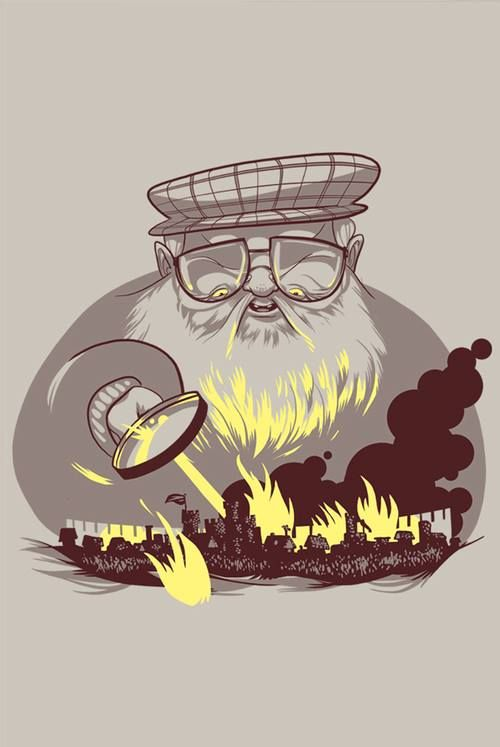

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.65$ --- 5 баллов

2) $0.65 > score \geqslant 0.50$ --- 4 балла

3) $0.50 > score \geqslant 0.45$ --- 3 балла

4) $0.45 > score \geqslant 0.40$ --- 2 балла

5) $0.40 > score \geqslant 0.35$ --- 1 балл

6) $0.35 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 49.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 4.01MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np

далее будут импортированы все необходимые библиотеки для дз

In [3]:
import matplotlib.pyplot as plt

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [4]:
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col = "S.No")

Посмотрите, какие типы данных представлены в нашем датасете

In [5]:
data.describe(include = 'object').T

,count,unique,top,freq
name,1557,1557,Melara Hetherspoon,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6


Теперь давайте посмотрим на столбцы с числовыми типами данных. Дополните код ниже. Для удобства восприятия мы транспонировали таблицу и ограничили вывод тремя столбцами - количество строк без NaN, максимальное и минимальное значение (о кастомизации вариантах вывода describe() вы можете почитать в документации по ссылке выше).


In [6]:
data.describe(include = [np.number]).T[['count', 'min', 'max']]

,count,min,max
male,1557.0,0.0,1.0
dateOfBirth,279.0,-25.0,299.0
book1,1557.0,0.0,1.0
book2,1557.0,0.0,1.0
book3,1557.0,0.0,1.0
book4,1557.0,0.0,1.0
book5,1557.0,0.0,1.0
isAliveMother,18.0,0.0,1.0
isAliveFather,22.0,0.0,1.0
isAliveHeir,21.0,0.0,1.0


Так мы проверим, есть ли в данных неадекватнные значения.   Большинство числовых столбцов - это числа от 0 до 1. Отрицательные значения `dateOfBirth` не являются ошибкой. Значения age и `numDeadRelations` также выглядят адекватными. Можно переходить к дальнейшим шагам анализа (анонс - а в тестовых данных нас будет ждать сюрприз).

**Задание 1.3.** Предобработка (очистка) данных.

В нашем домашнем задании все пропуски в данных (missing values) уже закодированы как NaN. Проанализируйте, в каких колонках и как часто встречаются NaN значения. Далее вам надо будет принять решение, как их обрабатывать.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [8]:
print(data.isna().sum())

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64


В этом задании удалять строки с NaN (dropna) мы не будем по следующим причинам:
- в обучающем датасете много признаков с большим количество пропусков. Если удалять все строки с NaN, то размер выборки сильно уменьшится. Мы потеряем много данных, которые можно было бы использовать для построения более точной модели.
- тестовом датасете также много признаков с NaN (вы можете в этом убедиться, если скачаете датасет и совершите с ним те же действия, что выше проделали с обучаюшим датасетом). Поэтому нам все-равно придется придумать способ кодировать NaN, чтобы модель делала прогнозы для всех персонажей из тестового датасета. Для этого нам потребуется сохранять, а не удалять данные в обучающем датасете.     



Как вы могли заметить, в наших данных очень много пропущенных значений, причём в некоторых случая пропущена **большая** часть значений. Поэтому заполнять по умолчанию медианой/средним/модой в данном случае - не самый лучший способ (однако, это довольно часто используемый метод заполнения, который может пригодиться вам в будущем)

Ниже мы посмотрим, как можно работать с признаками с большим количеством пропущенных значений.

**Задание 1.4.** Числовые признаки

У нас есть **признак popularity**. Постройте гистограмму распределения данного признака с количеством интервалов (bins), равным 50 (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

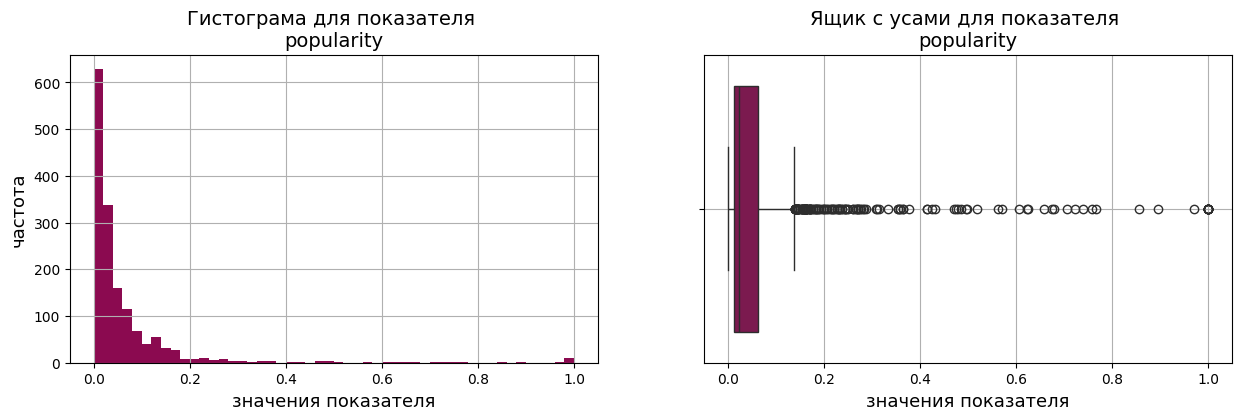

In [9]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
data['popularity'].plot(kind = 'hist',color = '#8B0A50', bins = 50)
plt.title(f'Гистограма для показателя \npopularity', fontsize=14)
plt.xlabel('значения показателя', fontsize=13)
plt.ylabel('частота', fontsize=13)
plt.grid(True)


plt.subplot(1, 2, 2)
sns.boxplot(x= data['popularity'],color = '#8B0A50')
plt.title(f'Ящик с усами для показателя \npopularity', fontsize=14)
plt.xlabel('значения показателя',fontsize=13 )
plt.grid(True);

Распределение сильно несимметрично. Можно преобразовать данный признак, например, по формуле `np.log10(data["popularity"]*M+1)` (добавляем 1 ради логарифма, так как для нектоторых персонажей `popularity==0`). В качестве M можно попробовать, например, M=100 или другое число.

При желании для `popularity` вы можете использовать свой способ шкалирования признаков с несимметричным распределением.


In [10]:
#print(data['popularity'].unique())

In [11]:
M = 100

In [12]:
data['popularity'] = np.log10(data['popularity']*M+1)

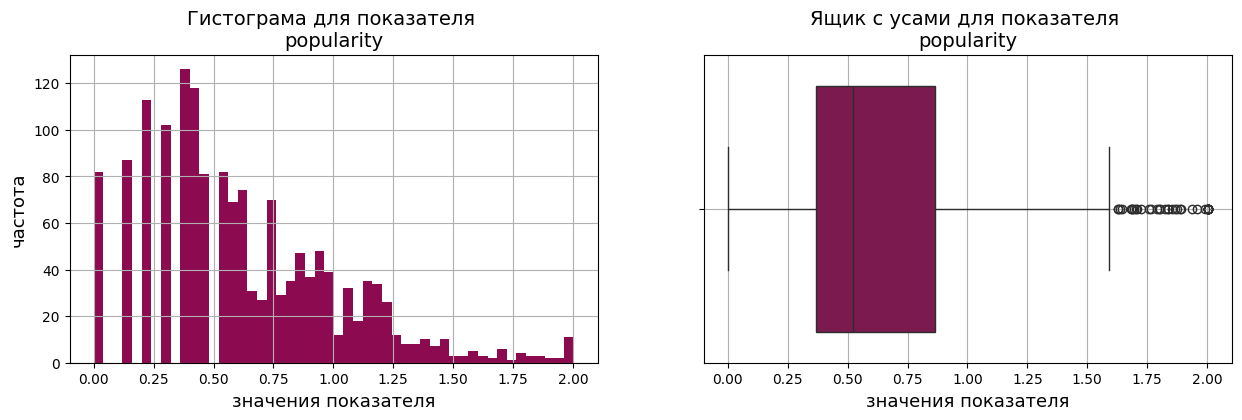

In [13]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
data['popularity'].plot(kind = 'hist',color = '#8B0A50', bins = 50)
plt.title(f'Гистограма для показателя \npopularity', fontsize=14)
plt.xlabel('значения показателя', fontsize=13)
plt.ylabel('частота', fontsize=13)
plt.grid(True)


plt.subplot(1, 2, 2)
sns.boxplot(x= data['popularity'],color = '#8B0A50')
plt.title(f'Ящик с усами для показателя \npopularity', fontsize=14)
plt.xlabel('значения показателя',fontsize=13 )
plt.grid(True);

В качестве альтернативного подхода вы можете попробовать дискретизацию признака popularity на основе квантилей (quantile binning), используя функцию qcut() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html). В этом случае вы преобразуете числовой признак popularity в категориальный, для которого в дальнейшем надо будет применить one-hot кодирование.

Теперь давайте обработаем **признак numDeadRelations**.
Посмотрите на частотное распределение этого признака. Лишь для малого числа персонажей `numDeadRelations>0`.

Создайте признак `boolDeadRelations`. Давайте упростим признак `numDeadRelations`, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. `numDeadRelations > 0`, и те, у которых не было, т.е. `numDeadRelations = 0`.

In [14]:
dt = data.query('numDeadRelations >0')

In [15]:
dt['numDeadRelations'].unique()

array([11,  1,  5,  3, 12, 10,  7,  4,  6, 15,  8,  2,  9])

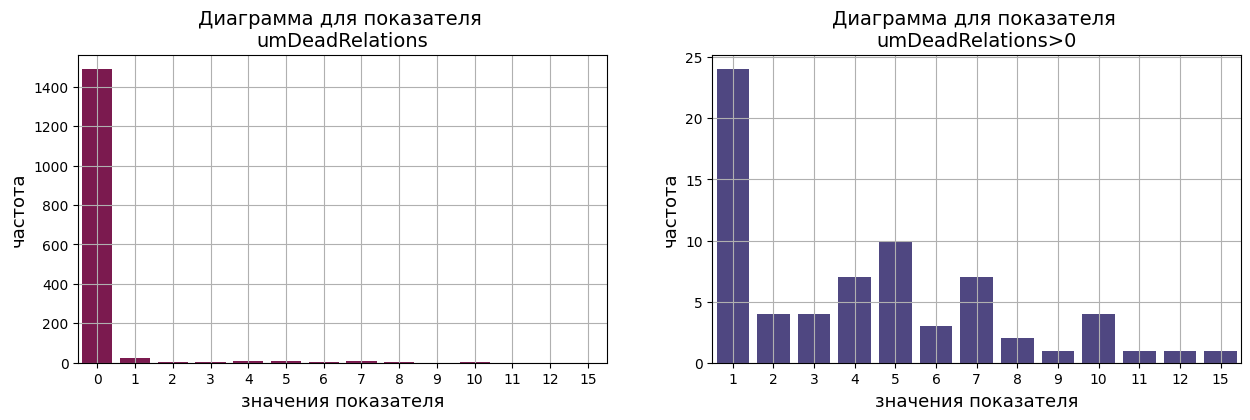

In [16]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(x = 'numDeadRelations', data =data, color = '#8B0A50')
plt.title(f'Диаграмма для показателя \numDeadRelations', fontsize=14)
plt.xlabel('значения показателя', fontsize=13)
plt.ylabel('частота', fontsize=13)
plt.grid(True)


plt.subplot(1, 2, 2)
sns.countplot(x = 'numDeadRelations', data =dt, color = '#483D8B')
plt.title(f'Диаграмма для показателя \numDeadRelations>0', fontsize=14)
plt.xlabel('значения показателя', fontsize=13)
plt.ylabel('частота', fontsize=13)
plt.grid(True)

In [17]:
data['boolDeadRelations'] = (data['numDeadRelations'] != 0).astype(str).str.replace('True','yes').str.replace('False','no')

In [18]:
print(data['boolDeadRelations'].unique())

['yes' 'no']


In [19]:
display(data[['numDeadRelations','boolDeadRelations' ]].sample(10))

,numDeadRelations,boolDeadRelations
S.No,,
1139,0,no
792,0,no
618,0,no
375,0,no
1239,0,no
722,0,no
830,0,no
327,0,no
1108,0,no


Наконец, давайте посмотрим на **признак age**. В нем очень много пропущенных значений. Для того, чтобы использовать в модели информацию о возрасте персонажа, мы создадим два новых признака: `age_value` и `age_no_data`

- Там где возраст указан, age_value принимает значение `age`, а `age_no_data` - значение 0.
- Там где возраст не указан, `age_value` принимает значение 0, а `age_no_data` - значение 1.  

Фактически, в переменной `age` мы заменяем NaN на 0, но одновременно добавляем в модель еще один бинарный признак `age_no_data`, несущий информацию о том, у каких персонажей не был указан возраст:        

In [20]:
#data['age'] = data['age'].fillna(data['age'].median())

In [21]:
data['age_value'] = [0 if np.isnan(x) else x for x in data['age']]# ДОБАВЬТЕ ВАШ КОД
data['age_no_data'] = [1 if np.isnan(x) else 0 for x in data['age']]

In [22]:
display(data[['age','age_value', 'age_no_data']].sample(10))

,age,age_value,age_no_data
S.No,,,
837,NaN,0.0,1
1250,47.0,47.0,0
1200,54.0,54.0,0
1341,NaN,0.0,1
1086,NaN,0.0,1
604,NaN,0.0,1
1081,NaN,0.0,1
161,NaN,0.0,1
577,NaN,0.0,1


In [23]:
dt1 = data.query('age >0')

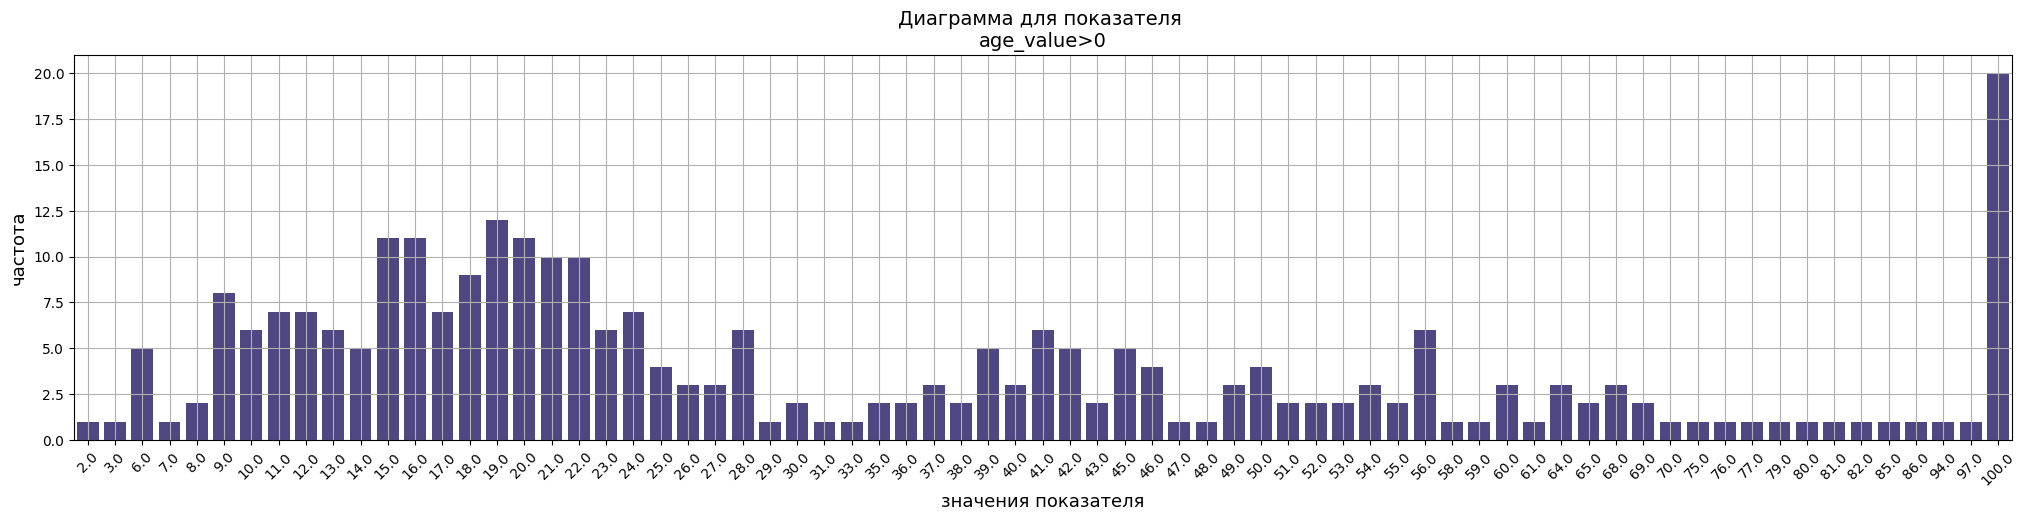

In [24]:
plt.figure(figsize=(25, 5))

sns.countplot(x = 'age', data =dt1, color = '#483D8B')
plt.title(f'Диаграмма для показателя \nage_value>0', fontsize=14)
plt.xlabel('значения показателя', fontsize=13)
plt.xticks(rotation=45);
plt.ylabel('частота', fontsize=13)
plt.grid(True)

In [25]:
data['date_value'] = [0 if np.isnan(x) else x for x in data['dateOfBirth']]# ДОБАВЬТЕ ВАШ КОД
data['date_no_data'] = [1 if np.isnan(x) else 0 for x in data['dateOfBirth']]

In [26]:
dt2 = data.query('date_value >0')

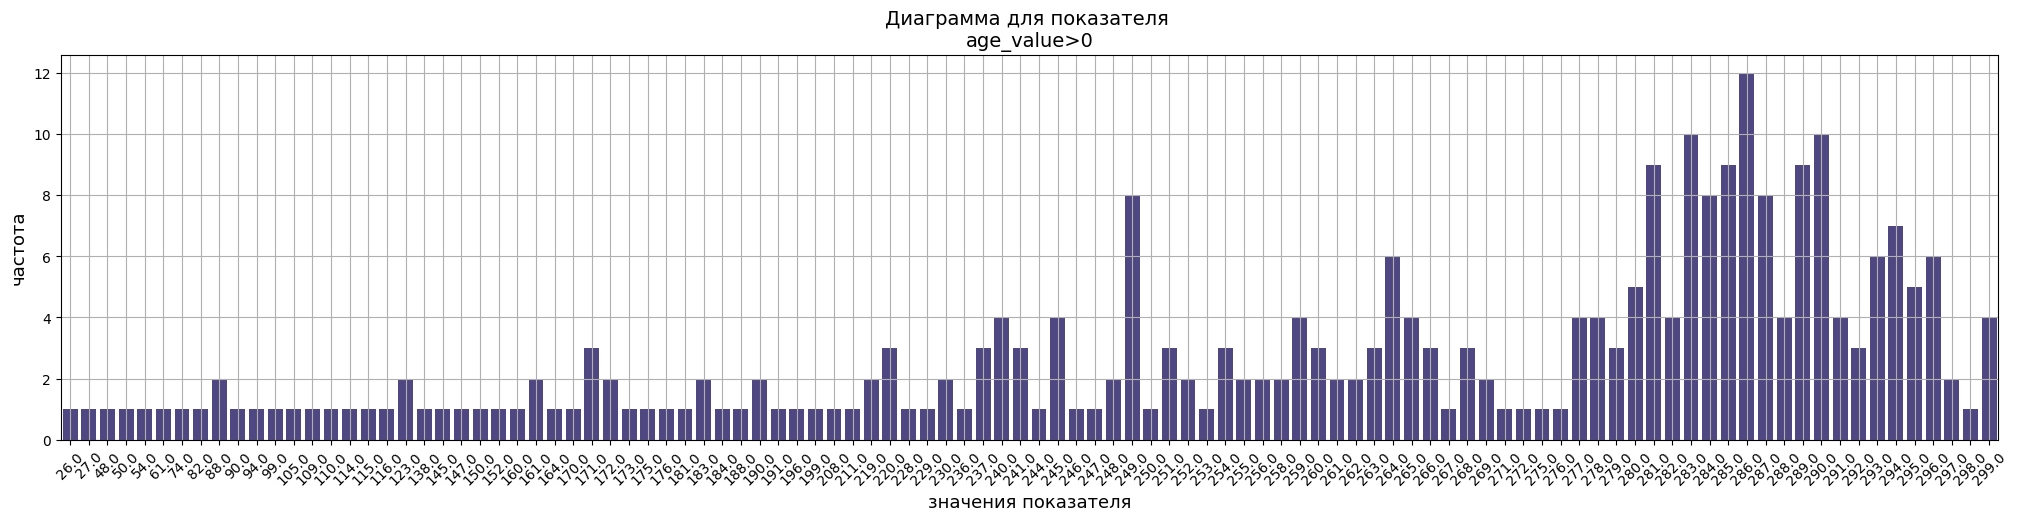

In [27]:
plt.figure(figsize=(25, 5))

sns.countplot(x = 'date_value', data =dt2, color = '#483D8B')
plt.title(f'Диаграмма для показателя \nage_value>0', fontsize=14)
plt.xlabel('значения показателя', fontsize=13)
plt.xticks(rotation=45);
plt.ylabel('частота', fontsize=13)
plt.grid(True)

Этот способ чем-то похож на работу с категориальной переменными с пропущенными значениями, когда мы добавляем еще одну категорию no_data и заменяем NaN на значение этой категории.

Если вы заходите похожим образом образом обработать признак `dateOfBirth`, **обратите внимание**, что у одних и тех же персонажей не указан и возраст, и год рождения.
То есть созданные признаки `age_no_data` и `dateOfBirth_no_data` будут полностью совпадать, и в модель надо будет включать только один из признаков: или `age_no_data`, или `dateOfBirth_no_data`.

**Задание 1.5.** Категориальные признаки с большим количеством категорий

**Признак culture** содержит информацию о принадлежности к одному из народов во вселенной Игры Престолов.

Давайте посмотрим, какие значения принимает данный признак. По умолчанию метод `value_counts()` игнорирует пропуски в данных, поэтому используем этот метод с параметром **dropna** со значением **False** (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [28]:
print(data['culture'].value_counts(dropna=False))#...ДОБАВЬТЕ ВАШ КОД

culture
NaN                        1069
Northmen                     94
Ironborn                     91
Free Folk                    45
Braavosi                     39
Valyrian                     28
Ghiscari                     17
Dornish                      17
Dothraki                     17
Reach                        13
Vale mountain clans          12
Rivermen                     10
Valemen                      10
northmen                      9
Westerman                     8
Free folk                     7
Tyroshi                       6
Qartheen                      5
Stormlands                    4
Summer Isles                  4
Astapori                      4
Westeros                      3
Dornishmen                    3
Ironmen                       3
Northern mountain clans       3
Westermen                     3
Lysene                        2
westermen                     2
Meereenese                    2
Myrish                        2
Crannogmen                    2


Из полученного частотного распределения видно, что для большого числа персонажей значения данного признака не указаны. Также есть много редких значений признака, которые в выборке повторяются один или несколько раз. Причина отчасти в том, что один и тот же народ упоминается в нашем датасете под разными названиями.

Данную проблему мы попытаемся решить, сгруппировав народы в более крупные категории. Так мы одновременно решим проблему того, что один и тот же народ назван в выборке разными способами.

Предоженный вариант группировки имеет определенную логику. Выделяются следующие группы:
- старые нации, которые уже не сущевали как отдельные народы на момент повествования основной линии повествования романов, но отдельные потомки могли еще быть живы
- народы, проживающие в королевствах континента Весторос (для каждого королевства - своя группа)
- народы континента Эссос
- прочие народы

**Обратите внимание, что некоторые варианты названий народов встречаются только в тестовых данных, и не встречаются в обучающих данных.** Такая ситуация нередко случается на практике. Поэтому, после обработки обучающих данных и обучения модели важно задать для модели правило, как она должна обрабатывать "незнакомые" категории в категориальных признаках. Например, можно относить объекты с "незнакомой" категорией к некоторой существующей категории или указать формулу расчета для "незнакомой" категории.     

Предложенный вам словарь `cultures_grouped` составлен по всем значениям признака `culture`, встречающимся в тренировочном либо в тестовом датасете. Здесь важно, что все укрупненные категории (ключи/keys словаря `cultures_grouped`) представлены в обоих датасетах, а уникальные для тестового датасета названия народов - это отдельные названия народов внутри укрупненных категорий (значения/values словаря). Поэтому, когда вы будете работать с тестовыми - просто применяйте этот словарь без указания правила обработки "незнакомых" категорий.

Давайте приступим к кодировке значений признака culture.
Для этого сначала инвертируем словарь *cultures_grouped*

Теперь создадим новый столбец с укрупненными значениями culture.

Для этого будем использовать метод `map()` с инвертированным словарем в качестве аргумента (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

Обратите внимание, что в словаре названия народов указаны в нижнем регистре. А в датасете используется как нижний, так и верхний регистр. Поэтому перед применением метода `map()` переведем значения столбца culture в нижний регистр при помощи метода `str.lower()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html).

Осталось заменить все NaN в созданном столбце на категорию `culture_no_data`:

In [29]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'Isles,Rivers,Stormlands and Rock': ['riverlands', 'rivermen', 'stormlander', 'stormlands',
                                            'westerman', 'westermen', 'westerlands'],
    'the Reach and Dorne': ['reach', 'reachmen', 'the reach', 'dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

In [30]:
cultures_grouped_inverted = {}

for k in cultures_grouped.keys():
  for v in cultures_grouped[k]:
    cultures_grouped_inverted.update({v:k})

In [31]:
data['culture_grouped'] = data['culture'].str.lower().map(cultures_grouped_inverted)
data['culture_grouped'] = data['culture_grouped'].str.lower().str.replace(' ','_')

In [32]:
data['culture_grouped'] = data['culture_grouped'].fillna(value='culture_no_date')

In [33]:
print(data['culture_grouped'].value_counts(dropna=False))

culture_grouped
culture_no_date                     1069
essos_nations                        109
the_north                            108
the_iron_islands                      95
other_nations                         57
the_reach_and_dorne                   34
old_nations                           32
isles,rivers,stormlands_and_rock      28
the_mountain_and_the_vale             25
Name: count, dtype: int64


In [34]:
display(data.sample(5))

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,age,numDeadRelations,popularity,isAlive,boolDeadRelations,age_value,age_no_data,date_value,date_no_data,culture_grouped
S.No,,,,,,,,,,,,,,,,,,,,,
38,Yohn Farwynd,NaN,1,Ironborn,NaN,NaN,NaN,NaN,House Farwynd of the Lonely Light,NaN,...,NaN,0,0.301756,1,no,0.0,1,0.0,1,the_iron_islands
733,Lyonel (knight),Ser,1,NaN,NaN,NaN,NaN,NaN,House Lannister,NaN,...,NaN,0,0.368806,1,no,0.0,1,0.0,1,culture_no_date
70,Ragnor Pyke,NaN,0,Ironborn,NaN,NaN,NaN,NaN,House Greyjoy,NaN,...,NaN,0,0.301756,1,no,0.0,1,0.0,1,the_iron_islands
945,Bryan Fossoway,Ser,1,NaN,NaN,NaN,NaN,NaN,House Fossoway of Cider Hall,NaN,...,NaN,0,0.565327,0,no,0.0,1,0.0,1,culture_no_date
287,Aegon Targaryen (son of Aenys I),Prince,1,Valyrian,26.0,NaN,NaN,NaN,House Targaryen,Rhaena Targaryen,...,17.0,0,0.000000,0,no,17.0,0,26.0,0,old_nations


In [35]:
platf_max = data.pivot_table(index = 'culture_grouped', values = 'name', aggfunc = 'count').sort_values(by = 'name', ascending = False)


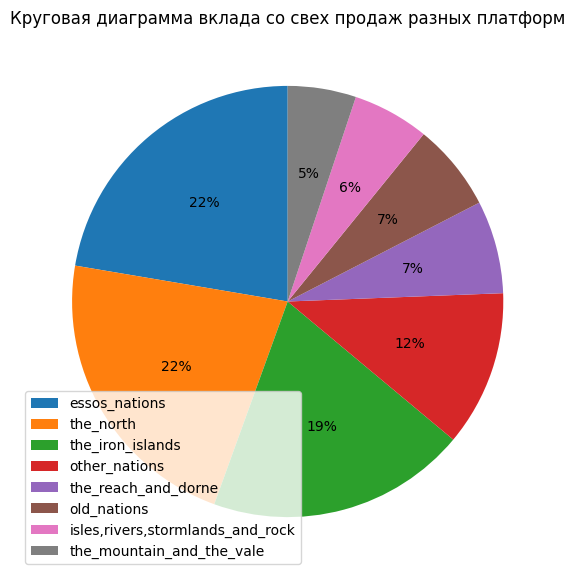

In [36]:
data_n = data.query('culture_grouped != "culture_no_date"')

platf = data_n.pivot_table(index = 'culture_grouped', values = 'name', aggfunc = 'count').sort_values(by = 'name', ascending = False)


platf.plot(kind = 'pie',subplots=True, startangle=90,figsize=(7, 7),autopct='%.0f%%', labeldistance=None);
plt.xlabel("")
plt.ylabel("")
plt.title('Круговая диаграмма вклада со свех продаж разных платформ')
plt.show()

Распределение сгруппированной переменной выглядит гораздо лучше. Но по прежнему есть несколько слабо представленых групп.

Дальнейшую работу с этим признаком проводите на свое усмотрение для повышения качества прогноза модели. Например, можно объединить несколько слабо представленных категорий в одну или применить другой подход.

In [37]:
#print(data['culture'].value_counts(dropna=False).head(35))

In [38]:
#print(data['title'].unique())

In [39]:
title_grouped = data.title.value_counts().loc[lambda x: x > 10].index
title_grouped

Index(['Ser', 'Maester', 'Archmaester', 'Lord', 'Septon', 'Winterfell'], dtype='object', name='title')

In [40]:
data.loc[~data["title"].isin(title_grouped), "title"] = "title_no_date" # replace rare titles with one value
data['title'] = data['title'].str.lower().str.replace(' ','_')
data.title.value_counts()

,count
title,
title_no_date,1151
ser,306
maester,29
archmaester,21
lord,19
septon,16
winterfell,15


In [41]:
house__grouped = data.house.value_counts().loc[lambda x: x > 15].index # the same for houses
house__grouped

Index(['House Frey', 'Night's Watch', 'House Stark', 'House Targaryen',
       'House Lannister', 'House Tyrell', 'House Greyjoy', 'House Osgrey'],
      dtype='object', name='house')

In [42]:
data.loc[~data.house.isin(house__grouped), "house"] = "house_no_date"
data['house'] = data['house'].str.lower().str.replace(' ','_')
data.house.value_counts()

,count
house,
house_no_date,1165
house_frey,89
night's_watch,88
house_stark,56
house_targaryen,40
house_lannister,36
house_tyrell,33
house_greyjoy,30
house_osgrey,20


In [43]:
print(data.isna().sum())

name                    0
title                   0
male                    0
culture              1069
dateOfBirth          1278
mother               1539
father               1535
heir                 1536
house                   0
spouse               1357
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1539
isAliveFather        1535
isAliveHeir          1536
isAliveSpouse        1357
isMarried               0
isNoble                 0
age                  1278
numDeadRelations        0
popularity              0
isAlive                 0
boolDeadRelations       0
age_value               0
age_no_data             0
date_value              0
date_no_data            0
culture_grouped         0
dtype: int64


**Задание 1.6.** Категориальные признаки в линейных моделях

Для включения категориальных признаков в линейную модель их нужно преобразовать в числовые признаки.

Если признак принимает одно из двух возможных значений (например, персонаж "появляется" или "не появляется" в 1-й книге), он напрямую кодируется в бинарный признак ("появляется" -> 1, "не появляется" -> 0). Если признак принимает больше двух значений, его можно преобразовать в несколько бинарных при помощи one-hot преобразования. В некоторых случаях бывает полезно объединить некоторые категории, как мы это поступили с признаком *culture*.

Порядковых признаков у нас в задаче нет, поэтому рассматривать их здесь мы не будем.

Для того, чтобы найти все порядковые признаки, посмотрим на количество уникальных значений, которые встречаются в столбцах. Для столбцов с типом object количество уникальных значений мы выводили  при помощи метода `describe()` в задании 1.2.

Чтобы посмотреть количество уникальных значений для всех столбцов, можно воспользоваться методом nunique() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)

In [44]:
# Количество уникальнх значений в каждом столбце
data.nunique()

,0
name,1557
title,7
male,2
culture,51
dateOfBirth,105
mother,16
father,19
heir,20
house,9
spouse,186


In [45]:
# Для числовых столбцов можно вывести в одну таблицу более детальную статистику, объединив выводы describe() и nunique()
# Код ниже требуется дополнить по аналогии с заданием 1.2.
data.describe(include = [np.number]).T[['count', 'min', 'max']].assign(N_unique_values = data.nunique())

,count,min,max,N_unique_values
male,1557.0,0.0,1.000000,2
dateOfBirth,279.0,-25.0,299.000000,105
book1,1557.0,0.0,1.000000,2
book2,1557.0,0.0,1.000000,2
book3,1557.0,0.0,1.000000,2
book4,1557.0,0.0,1.000000,2
book5,1557.0,0.0,1.000000,2
isAliveMother,18.0,0.0,1.000000,2
isAliveFather,22.0,0.0,1.000000,2
isAliveHeir,21.0,0.0,1.000000,2


Посмотрев на количество уникальных значений мы можем выделить категориальные признаки. Например, `popularity` принимает значения от 0 до 1, но это непрерывный числовой признак. Остальные признаки со значениями от 0 до 1 - принимают только два значения, то есть являются бинарными.

Бинарные признаки без NaN полностью готовы для включения в модель. Некоторые бинарные признаки содержат пропуски, поэтому, если вы захотите включить их в модель, их потребуется обработать.

Для бинарных признаков их связь с зависимой переменной можно прикинуть по таблице корреляций. Для категориальных признаков с количеством значений больше двух (или с двумя значениями и NaN) можно сделать one-hot преобразования и посчитать корреряцию зависимой переменной с набором сгенерированных бинарных признаков.
В качестве альтернативного подхода можно использовать сравнение средних значений зависимой переменной для разных категорий исследуемого признака. Чем сильнее различаются средние значения целевой переменной между категориями, тем вероятнее, что данный признак связан с зависимой переменной.

In [46]:
# попробуйте провести сравнение средних зависимой пременной isAlive для признака isAliveSpouse
# одним из приведенных ниже способов:

#data.groupby('isAliveSpouse', dropna = False)['isAlive'].mean()
#pd.pivot_table(data = data, values = 'isAlive', index = 'isAliveSpouse', aggfunc=['mean', 'count'], dropna=False)

In [47]:
list = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse' ]

for word in list:
  #data[word] = data[word].str.replace(' ','_').str.lower()
  print(f'уникальные значения столбца {word}: {data[word].unique()}\n')

уникальные значения столбца isAliveMother: [ 1. nan  0.]

уникальные значения столбца isAliveFather: [ 0. nan  1.]

уникальные значения столбца isAliveHeir: [ 0. nan  1.]

уникальные значения столбца isAliveSpouse: [nan  1.  0.]



In [48]:
list = ['mother', 'father',
       'heir', 'spouse']

for word in list:
  #data[word] = data[word].fillna(value = 'unknown')
  print(f'уникальные значения столбца {word}: {data[word].unique()}\n')

уникальные значения столбца mother: ['Rhaenyra Targaryen' nan 'Cersei Lannister' 'Alyssa Targaryen'
 'Visenya Targaryen' 'Catelyn Stark' 'Cassana Estermont'
 'Valaena Velaryon' 'Alicent Hightower' 'Rhaenys Targaryen'
 'Mariah Martell' 'Shaera Targaryen' 'Daenaera Velaryon'
 'Naerys Targaryen' 'Lady of House Sunderly' 'Betha Blackwood'
 'Alyssa Velaryon']

уникальные значения столбца father: ['Daemon Targaryen' nan 'Robert Baratheon' 'Baelon Targaryen'
 'Aegon I Targaryen' 'Eddard Stark' 'Steffon Baratheon'
 'Tristifer IV Mudd' 'Aerion Targaryen' 'Viserys I Targaryen'
 'Daeron II Targaryen' 'Jaehaerys II Targaryen' 'Brandon Stark'
 'Aegon III Targaryen' 'Aegon IV Targaryen' 'Quellon Greyjoy'
 'Qhorwyn Hoare' 'Aegon V Targaryen' 'Aenys I Targaryen' 'Halleck Hoare']

уникальные значения столбца heir: ['Aegon IV Targaryen' nan 'Myrcella Baratheon' 'Rhaenyra Targaryen'
 'Tommen Baratheon' 'Jaehaerys Targaryen' 'Bran Stark' 'Shireen Baratheon'
 'Aenys Targaryen' 'Daeron II Targaryen' 'Daeron

In [49]:
list = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']

for word in list:
  data[word] = data[word].astype('str').replace('1.0','yes').str.replace('0.0','no')
  data[word] = data[word].replace('nan','unknown')

  print(f'уникальные значения столбца {word}: {data[word].unique()}\n')

уникальные значения столбца isAliveMother: ['yes' 'unknown' 'no']

уникальные значения столбца isAliveFather: ['no' 'unknown' 'yes']

уникальные значения столбца isAliveHeir: ['no' 'unknown' 'yes']

уникальные значения столбца isAliveSpouse: ['unknown' 'yes' 'no']



**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик. Не забудьте, что потом аналогичным образом вам надо будет преобразовывать тестовый датасет, используя тот же алгоритм кодирования признаков.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [50]:
# ...

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [51]:
!pip -q install phik

In [52]:
from phik import phik_matrix

In [53]:
print(data.isna().sum())

name                    0
title                   0
male                    0
culture              1069
dateOfBirth          1278
mother               1539
father               1535
heir                 1536
house                   0
spouse               1357
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother           0
isAliveFather           0
isAliveHeir             0
isAliveSpouse           0
isMarried               0
isNoble                 0
age                  1278
numDeadRelations        0
popularity              0
isAlive                 0
boolDeadRelations       0
age_value               0
age_no_data             0
date_value              0
date_no_data            0
culture_grouped         0
dtype: int64


In [54]:
data_new  = data
data_new = data_new.drop(['culture', 'dateOfBirth','mother','father', 'age', 'heir', 'numDeadRelations','name','spouse'], axis=1)
data_new = data_new.drop(['date_no_data'], axis=1)

In [55]:
print(data_new.isna().sum())

title                0
male                 0
house                0
book1                0
book2                0
book3                0
book4                0
book5                0
isAliveMother        0
isAliveFather        0
isAliveHeir          0
isAliveSpouse        0
isMarried            0
isNoble              0
popularity           0
isAlive              0
boolDeadRelations    0
age_value            0
age_no_data          0
date_value           0
culture_grouped      0
dtype: int64


In [56]:
display(data_new.head())

,title,male,house,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,...,isAliveSpouse,isMarried,isNoble,popularity,isAlive,boolDeadRelations,age_value,age_no_data,date_value,culture_grouped
S.No,,,,,,,,,,,,,,,,,,,,,
1,title_no_date,1,house_no_date,0,0,0,0,0,yes,no,...,unknown,0,0,1.789123,0,yes,0.0,1,0.0,culture_no_date
2,title_no_date,1,house_frey,1,1,1,1,1,unknown,unknown,...,yes,1,1,1.957282,1,yes,97.0,0,208.0,"isles,rivers,stormlands_and_rock"
3,ser,1,house_no_date,0,0,0,1,0,unknown,unknown,...,unknown,0,1,1.443355,1,no,0.0,1,0.0,culture_no_date
4,title_no_date,0,house_no_date,0,0,0,0,0,unknown,unknown,...,no,1,1,1.287682,0,no,23.0,0,82.0,culture_no_date
5,title_no_date,0,house_no_date,0,0,0,1,0,unknown,unknown,...,yes,1,1,0.728177,1,no,29.0,0,276.0,the_reach_and_dorne


In [57]:
import warnings
warnings.filterwarnings("ignore")

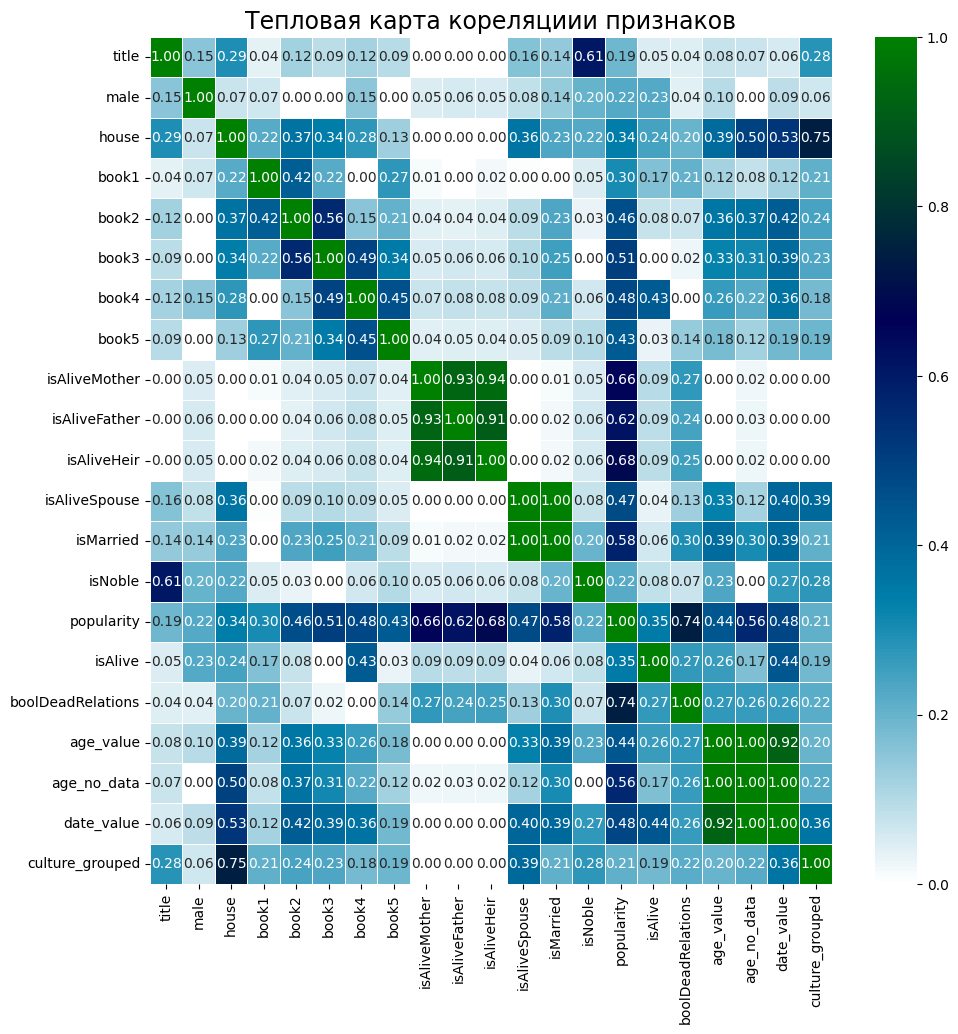

In [58]:
# ...
plt.figure(figsize=(11, 11));
sns.heatmap(
    data_new.phik_matrix(interval_cols=['popularity', 'age_value', 'date_value'])
    ,annot = True
    ,fmt = '.2f'
    ,linewidth=.5
    ,cmap = "ocean_r"
);
plt.title('Тепловая карта кореляциии признаков', fontsize=17);

In [59]:
data_new = data_new.drop(['isAliveHeir','isAliveSpouse','date_value'], axis=1)

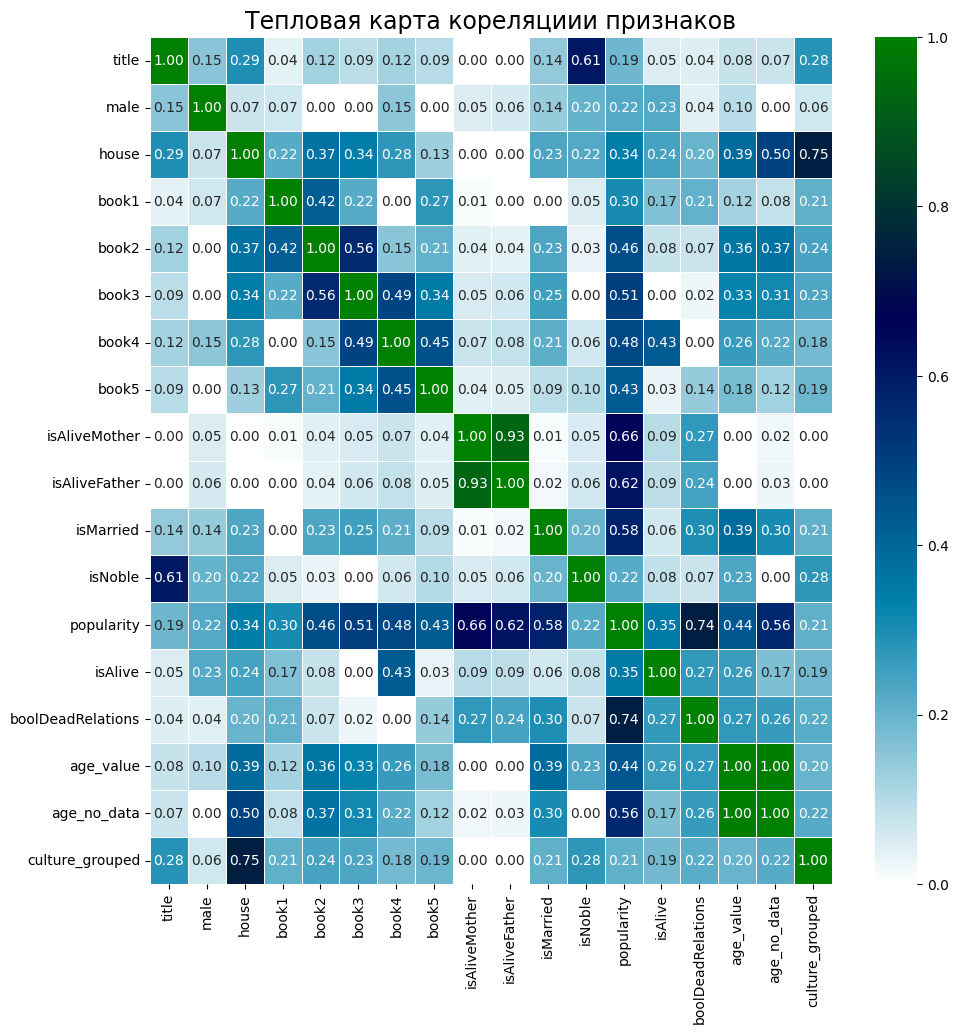

In [60]:
plt.figure(figsize=(11, 11));
sns.heatmap(
    data_new.phik_matrix(interval_cols=['popularity', 'age_value'])
    ,annot = True
    ,fmt = '.2f'
    ,linewidth=.5
    ,cmap = "ocean_r"
);
plt.title('Тепловая карта кореляциии признаков', fontsize=17);

In [61]:
data_new = data_new.drop(['isAliveMother','age_no_data'], axis=1)

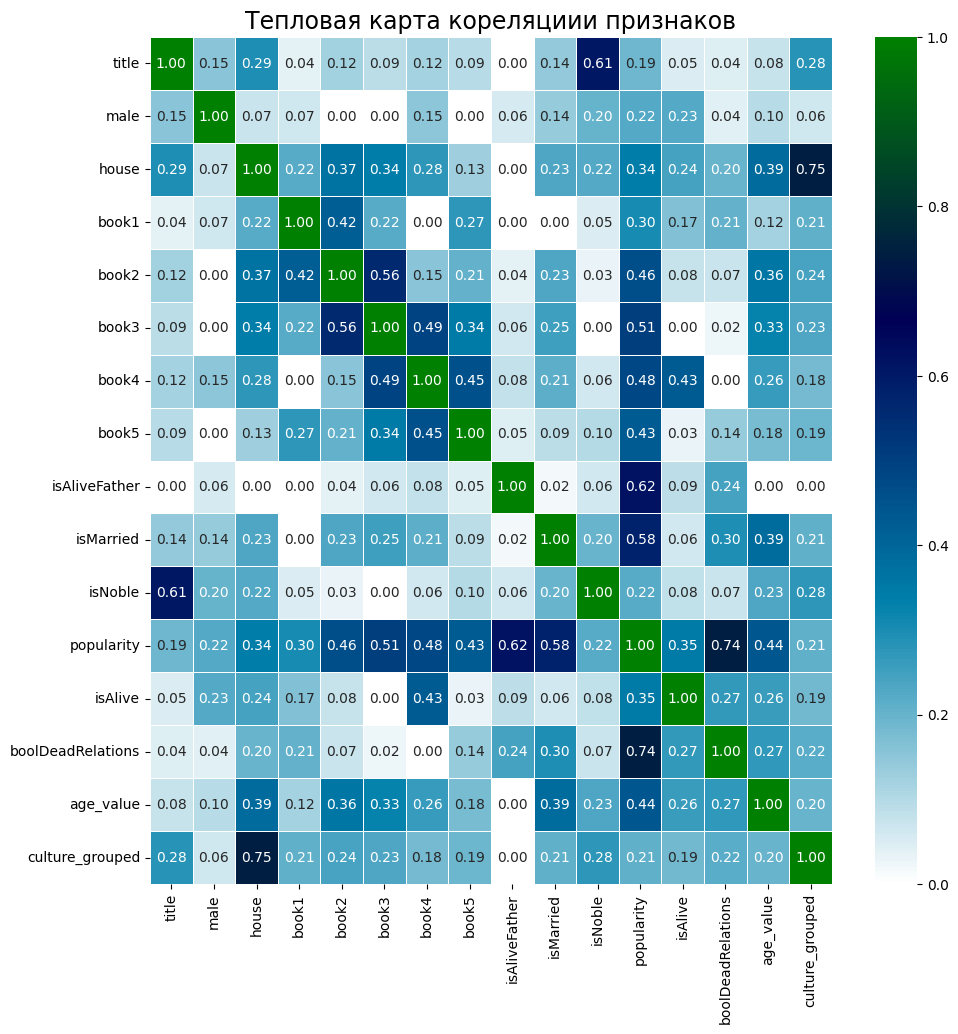

In [62]:
plt.figure(figsize=(11, 11));
sns.heatmap(
    data_new.phik_matrix(interval_cols=['popularity', 'age_value'])
    ,annot = True
    ,fmt = '.2f'
    ,linewidth=.5
    ,cmap = "ocean_r"
);
plt.title('Тепловая карта кореляциии признаков', fontsize=17);

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, которые вы отобрали для включения в модель, и `y`, которая будет хранить только значения целевой переменной.

In [63]:
X =  data_new.drop('isAlive', axis=1)
y = data_new['isAlive']

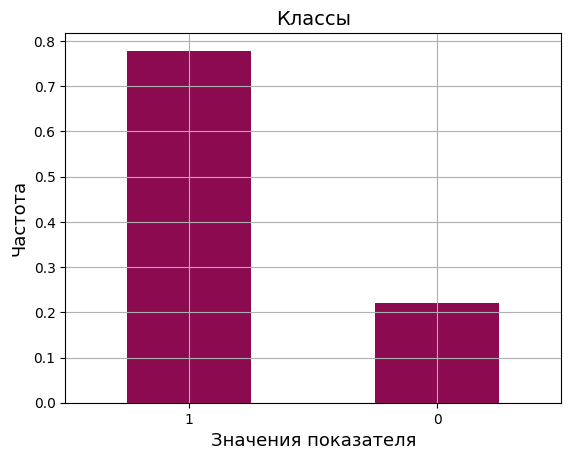

In [64]:
data_new['isAlive'].value_counts(normalize=True).plot(kind='bar', color = '#8B0A50')
plt.title('Классы',fontsize=14)
plt.xlabel('Значения показателя', fontsize=13)
plt.ylabel('Частота', fontsize=13)
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

**Задание 1.10.** Разделите датасет обучащую и валидационные части (train и val) при помощи функции `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
RANDOM_STATE = 42
TEST_SIZE = 0.2

In [67]:
# не забудьте в функции train_test_split задать параметр random_state,
# чтобы обеспечить повторяемость разбиения выборки на train и validation части.
# Это позволит сравнивать метрики моделей с различными методами подготовки признаков
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size=TEST_SIZE,random_state = RANDOM_STATE, stratify=y)

In [68]:
print(
    f'Разделение выборки в следующих пропорциях:\n'
    f'{(len(X_train)/len(data)):.0%} — тренировочная;\n'
    f'{(len(X_val)/len(data)):.0%} — валидационная;'
)

Разделение выборки в следующих пропорциях:
80% — тренировочная;
20% — валидационная;


In [69]:
print(
    f'Размер матриц:\n'
    f'{X_train.shape[0], y_train.shape[0]} — тренировочная;\n'
    f'{X_val.shape[0], y_val.shape[0]} — валидационная;\n'
)

Размер матриц:
(1245, 1245) — тренировочная;
(312, 312) — валидационная;



## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.**


Вым можете работать с одно из предложенных моделей из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Однако в этом домашнем задании мы предлагаем выбрать и поработать с моделью `LogisticRegression`.

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,  RobustScaler, OrdinalEncoder ,PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

In [72]:
data_new.columns

Index(['title', 'male', 'house', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveFather', 'isMarried', 'isNoble', 'popularity', 'isAlive',
       'boolDeadRelations', 'age_value', 'culture_grouped'],
      dtype='object')

In [73]:
num_columns = ['popularity', 'age_value']
#ohe_columns = [ ]
#ord_columns = ['culture_grouped','house_category', 'title_category']

ord_columns = ['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveFather',
       'isMarried', 'isNoble', 'boolDeadRelations', 'culture_grouped', 'house', 'title'
       ]

In [74]:
#ohe_pipe = Pipeline([('ohe', OneHotEncoder(drop='first', handle_unknown='error'))])

In [75]:
ord_pipe = Pipeline([('ord',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan))])

In [76]:
num_pipe = Pipeline([('robustscaler', RobustScaler()),
                ('powertransform', PowerTransformer())])

In [77]:
data_preprocessor_lir = ColumnTransformer(
    [('ord', ord_pipe, ord_columns),
     ('num',RobustScaler(), num_columns)],
    remainder='passthrough'
)

In [78]:
pipe_lir = Pipeline(
    [
        ('preprocessor', data_preprocessor_lir),
        ('lir', LogisticRegression(class_weight = 'balanced',solver='liblinear',random_state = RANDOM_STATE, penalty='l1'))

    ]
)

In [79]:
parameters_lir = {
    'lir__C': [1, 10, 50],
    #'lir__max_iter': [10, 50, 100],
}

In [80]:
lir_grid = GridSearchCV(pipe_lir, parameters_lir, cv=3, scoring='accuracy')

In [81]:
lir_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord',
                                                                         Pipeline(steps=[('ord',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=nan))]),
                                                                         ['male',
                                                                          'book1',
                                                                          'book2',
                                                                          'book3',
                                                                          'book4',
                                                                          'book5',
                                                                          'isAliveFather',
                                                                          'isMarried',
                                                                          'isNoble',
                                                                          'boolDeadRelations',
                                                                          'culture_grouped',
                                                                          'house',
                                                                          'title']),
                                                                        ('num',
                                                                         RobustScaler(),
                                                                         ['popularity',
                                                                          'age_value'])])),
                                       ('lir',
                                        LogisticRegression(class_weight='balanced',
                                                           penalty='l1',
                                                           random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'lir__C': [1, 10, 50]}, scoring='accuracy')

In [82]:
lir_fit_score = lir_grid.best_score_
print('Лучшая модель и её параметры:', lir_grid.best_estimator_)
print(f'Лучший показатель ROC-AUC: {lir_fit_score:.3f}')

Лучшая модель и её параметры: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['male', 'book1', 'book2',
                                                   'book3', 'book4', 'book5',
                                                   'isAliveFather', 'isMarried',
                                                   'isNoble',
                                                   'boolDeadRelations',
                                                   'culture_grouped', 'house',
                                                   'title']),
            

In [83]:
y_pred = lir_grid.best_estimator_.predict(X_val)

In [84]:
accuracy = accuracy_score(y_val, y_pred)
print('AUC-ROC на тестовом наборе данных:', round(accuracy, 4))

AUC-ROC на тестовом наборе данных: 0.6699


В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [85]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [86]:
# Шаг 3. Предсказание на тестовых данных

# ваш код здесь

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.6699


Возможно, вы решите вернуться на несколько шагов и попробовать другие варианты преобразования и подбора признаков в модель. **Выберите** лучшую модель.

### Тестовый датасет

В самом начале нашего домашнего задания мы скачивали тестовый датасет. Загрузите его в Pandas DataFrame при помощи функции read_csv

In [87]:
data_1 = pd.read_csv('/content/game_of_thrones_test.csv', index_col = "S.No")

In [88]:
#Подсказка
data_1.loc[data_1['age']<0] # Находим данные с ошибками в дате рождения и возрасте

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1685,Doreah,NaN,0,Lysene,278279.0,NaN,NaN,NaN,House Targaryen,NaN,...,1,NaN,NaN,NaN,NaN,0,0,-277980.0,0,0.110368
1869,Rhaego,NaN,0,NaN,298299.0,NaN,NaN,NaN,House Targaryen,NaN,...,0,NaN,NaN,NaN,NaN,0,0,-298001.0,6,0.167224


In [89]:
#Вы можете аккуратно поправить тестовые данные, воспользовавшись, например следующим кодом:
data_1.loc[1685, 'age'] = 0.
data_1.loc[1869, 'age'] = 0.
# замены в строке 1685: dateOfBirth -> 278. и age -> 0.
# замены в строке 1869: dateOfBirth -> 299. и age -> 0.

In [90]:
data_1.loc[data_1['age']<0]

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,


In [91]:
M = 100

In [92]:
data_1['popularity'] = np.log10(data_1['popularity']*M+1)

In [93]:
data_1['boolDeadRelations'] = (data_1['numDeadRelations'] != 0).astype(str).str.replace('True','yes').str.replace('False','no')

In [94]:
data_1['boolDeadRelations'].unique()

array(['no', 'yes'], dtype=object)

In [95]:
data_1['age_value'] = [0 if np.isnan(x) else x for x in data_1['age']]# ДОБАВЬТЕ ВАШ КОД
data_1['age_no_data'] = [1 if np.isnan(x) else 0 for x in data_1['age']]

In [96]:
data_1['date_value'] = [0 if np.isnan(x) else x for x in data_1['dateOfBirth']]# ДОБАВЬТЕ ВАШ КОД
data_1['date_no_data'] = [1 if np.isnan(x) else 0 for x in data_1['dateOfBirth']]

In [97]:
data_1['culture_grouped'] = data_1['culture'].str.lower().map(cultures_grouped_inverted)
data_1['culture_grouped'] = data_1['culture_grouped'].str.lower().str.replace(' ','_')

In [98]:
data_1['culture_grouped'] = data_1['culture_grouped'].fillna(value='culture_no_date')

In [99]:
data_1['culture_grouped'].unique()

array(['culture_no_date', 'essos_nations',
       'isles,rivers,stormlands_and_rock', 'other_nations',
       'the_reach_and_dorne', 'the_iron_islands', 'old_nations',
       'the_mountain_and_the_vale', 'the_north'], dtype=object)

In [100]:
#data_1['title'].unique()

In [101]:
data_1.loc[~data_1["title"].isin(title_grouped), "title"] = "title_no_date" # replace rare titles with one value
data_1['title'] = data_1['title'].str.lower().str.replace(' ','_')
data_1.title.value_counts()

,count
title,
title_no_date,296
ser,78
maester,10
septon,2
winterfell,2
lord,1


In [102]:
data_1.loc[~data_1.house.isin(house__grouped), "house"] = "house_no_date"
data_1['house'] = data_1['house'].str.lower().str.replace(' ','_')
data_1.house.value_counts()

,count
house,
house_no_date,298
house_targaryen,22
night's_watch,17
house_stark,16
house_lannister,13
house_greyjoy,11
house_frey,8
house_tyrell,3
house_osgrey,1


In [103]:
list = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']

for word in list:
  data_1[word] = data_1[word].astype('str').replace('1.0','yes').str.replace('0.0','no')
  data_1[word] = data_1[word].replace('nan','unknown')

  print(f'уникальные значения столбца {word}: {data_1[word].unique()}\n')

уникальные значения столбца isAliveMother: ['unknown' 'yes']

уникальные значения столбца isAliveFather: ['unknown' 'no']

уникальные значения столбца isAliveHeir: ['unknown' 'no' 'yes']

уникальные значения столбца isAliveSpouse: ['unknown' 'yes' 'no']



In [104]:
data['title'].unique()

array(['title_no_date', 'ser', 'archmaester', 'maester', 'lord', 'septon',
       'winterfell'], dtype=object)

In [105]:
data_nn = data_1[['male', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveFather', 'isMarried', 'isNoble',
       'popularity', 'boolDeadRelations', 'age_value',
       'culture_grouped', 'house', 'title']]

In [106]:
sssdata_nn.shape

(389, 15)

In [114]:
y_pred = lir_grid.best_estimator_.predict(data_nn)

In [115]:
print(y_pred.sum())

140


По аналогии с тем, как мы работали с обучающим датасетом, давайте посмотрим в тестовом датасете на статистики признаков с разными типами данных  

Преобразуйте признаки в тестовом датасете по тому же пайплайну, как вы преобразовывали обучающие данные. Примените вашу лучшую модель на тестовом датасете для получения прогноза целевой переменной `isAlive`

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [116]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.47MB/s]


In [117]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [118]:
submission['isAlive'] = y_pred

In [119]:
print(submission['isAlive'].sum())

140


Как сохранить измененный Pandas DataFrame в csv файл:

In [120]:
submission.to_csv("/content/new_submission.csv", index=False)